# K-Means Clustering

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [17]:
dataset = pd.read_csv("Mall_Customers_kmeans.csv", index_col = 0)

In [19]:
dataset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [21]:
dataset.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [23]:
dataset.shape

(200, 4)

In [29]:
dataset.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [31]:
dataset.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


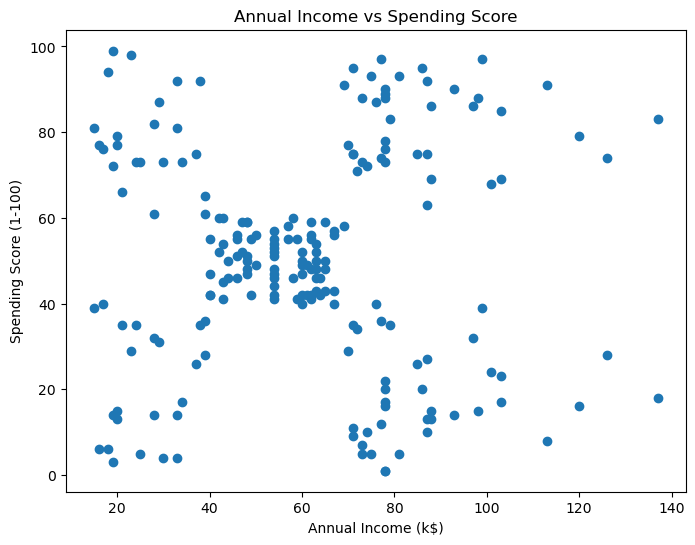

In [45]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(dataset['Annual Income (k$)'], dataset['Spending Score (1-100)'])

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income vs Spending Score")

plt.show()

In [52]:
X = dataset.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values

In [60]:
scaler = MinMaxScaler()
scaler = scaler.fit_transform(X)

In [62]:
print(scaler)

[[0.         0.3877551 ]
 [0.         0.81632653]
 [0.00819672 0.05102041]
 [0.00819672 0.7755102 ]
 [0.01639344 0.39795918]
 [0.01639344 0.76530612]
 [0.02459016 0.05102041]
 [0.02459016 0.94897959]
 [0.03278689 0.02040816]
 [0.03278689 0.7244898 ]
 [0.03278689 0.13265306]
 [0.03278689 1.        ]
 [0.04098361 0.14285714]
 [0.04098361 0.7755102 ]
 [0.04098361 0.12244898]
 [0.04098361 0.79591837]
 [0.04918033 0.34693878]
 [0.04918033 0.66326531]
 [0.06557377 0.28571429]
 [0.06557377 0.98979592]
 [0.07377049 0.34693878]
 [0.07377049 0.73469388]
 [0.08196721 0.04081633]
 [0.08196721 0.73469388]
 [0.10655738 0.13265306]
 [0.10655738 0.82653061]
 [0.10655738 0.31632653]
 [0.10655738 0.6122449 ]
 [0.1147541  0.30612245]
 [0.1147541  0.87755102]
 [0.12295082 0.03061224]
 [0.12295082 0.73469388]
 [0.14754098 0.03061224]
 [0.14754098 0.92857143]
 [0.14754098 0.13265306]
 [0.14754098 0.81632653]
 [0.1557377  0.16326531]
 [0.1557377  0.73469388]
 [0.18032787 0.25510204]
 [0.18032787 0.75510204]


# Choosing optimum number of clusters

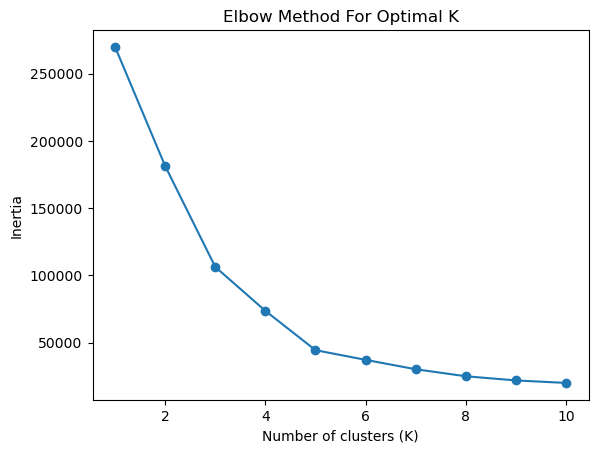

In [66]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.show()

# k can be between 4 to 6 because of the substantial decrease(an elbow) let's take k = 5

In [73]:
kmeans = KMeans(n_clusters=5, init = 'k-means++') 
label = kmeans.fit_predict(X)  
print(label)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 4 3 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 2 0 2 4 2 0 2 0 2 4 2 0 2 0 2 0 2 0 2 4 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


# Visualizing the clusters

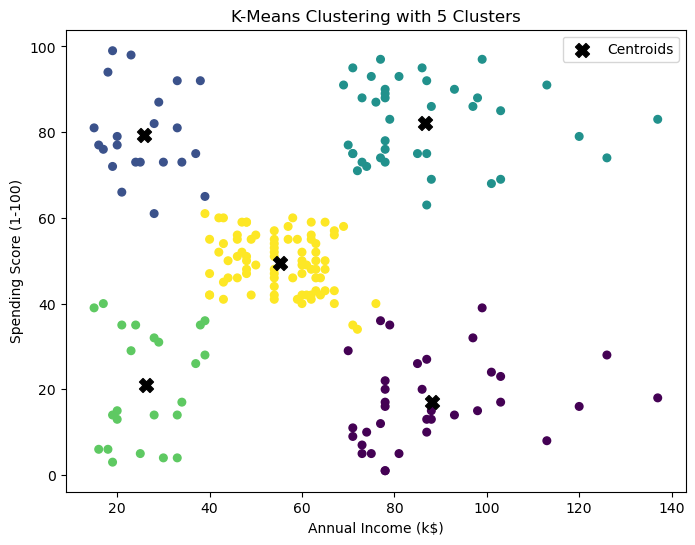

In [112]:
plt.figure(figsize=(8, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=label, cmap='viridis', s=30)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=100, label="Centroids")

plt.title('K-Means Clustering with 5 Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.legend()
plt.show()